# Enter Student Name & ID

In [89]:
student_id =  400101175 #@param {type:"integer"}
student_name = "Mohammad Armin Dehghan" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101175
your name: Mohammad Armin Dehghan


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [90]:
import numpy as np

In [91]:
def myPCA(X, num_components):
    X_centered = X - np.mean(X, axis=0)
    
    covariance_matrix = np.cov(X_centered, rowvar=False) 
    
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    print(eigenvectors)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]
    
    X_pca = np.dot(X_centered, selected_eigenvectors)
    
    return X_pca



### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [92]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


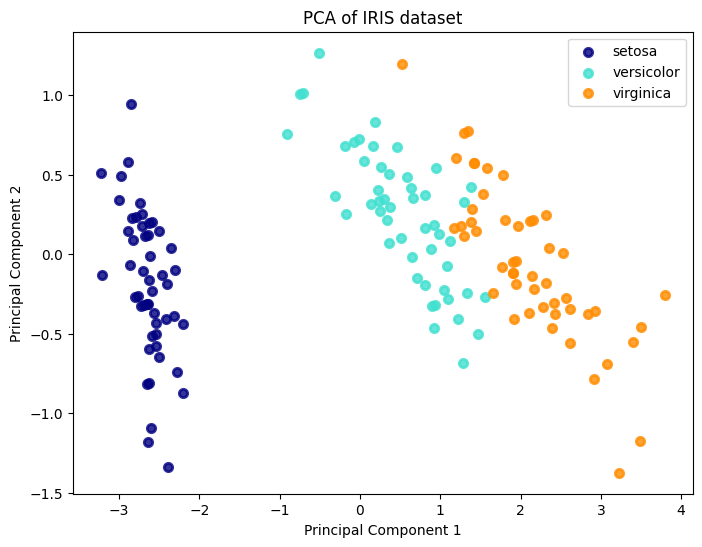

In [93]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_pca = myPCA(X, num_components=2)

plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

#### What Are Eigenfaces?
Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. The concept is based on Principal Component Analysis (PCA) and was developed by Matthew Turk and Alex Pentland in 1991. In this approach, the eigenvectors, referred to as "eigenfaces" when dealing with face images, represent the directions of maximum variance in the high-dimensional data space.

#### How Are Eigenfaces Computed?
1. **Gathering the Data**: Collect a large set of face images. These images are typically converted into grayscale and then represented as vectors. If each image is of size \( m \times n \), it is reshaped into an \( mn \)-dimensional vector.

2. **Centering the Data**: Calculate the mean face image and subtract it from each face image vector to center the data.

3. **Constructing the Covariance Matrix**: Construct the covariance matrix of the centered data. Since the dimensionality of the data is high, it is often computationally efficient to use a trick involving the Gram matrix.

4. **Eigenvalue Decomposition**: Perform eigenvalue decomposition on the covariance matrix to find eigenvalues and eigenvectors. The eigenvectors corresponding to the largest eigenvalues are selected, as they represent the principal components (eigenfaces) that capture the most variance in the data.

5. **Forming the Eigenfaces**: The selected eigenvectors are reshaped back into the original image dimensions. These reshaped vectors are the eigenfaces.

#### Relation to PCA
Eigenfaces are directly related to PCA as they are the eigenvectors of the covariance matrix of face images:
- **Principal Components**: In PCA, the principal components are the directions of maximum variance in the data. Eigenfaces are these principal components when the data are face images.
- **Dimensionality Reduction**: PCA reduces the dimensionality of the data by projecting it onto the top principal components. Similarly, face images can be represented using a small number of eigenfaces, which reduces the dimensionality while preserving the essential features for recognition.
- **Reconstruction**: Any face image can be approximated as a linear combination of the eigenfaces. This allows for efficient storage and processing of face images.

#### Applications
1. **Face Recognition**: Eigenfaces are widely used in face recognition systems. By projecting a face image onto the eigenface space, a compact representation of the face is obtained, which can be compared with stored representations for recognition.
2. **Facial Feature Extraction**: Eigenfaces help in extracting meaningful features from face images that are useful in various computer vision tasks.
3. **Image Compression**: Eigenfaces can be used to compress face images by storing only the coefficients of the linear combination of the top eigenfaces.

Eigenfaces provide a powerful method for representing and recognizing faces, leveraging the principles of PCA to capture the most significant features in the data.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [ ]:
%pip install opencv-python

In [94]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder, num_train=5, num_test=5):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    label = 0
    
    for subfolder in sorted(os.listdir(folder)):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            images = []
            for filename in sorted(os.listdir(subfolder_path)):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images.append(img.flatten())
            
            if len(images) == (num_train + num_test):
                X_train.extend(images[:num_train])
                X_test.extend(images[num_train:num_train + num_test])
                y_train.extend([label] * num_train)
                y_test.extend([label] * num_test)
                label += 1
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return X_train, X_test, y_train, y_test

dataset_folder = 'ORL' 

X_train, X_test, y_train, y_test = load_images_from_folder(dataset_folder)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')



X_train shape: (200, 2304)
X_test shape: (200, 2304)
y_train shape: (200,)
y_test shape: (200,)


### 2.3 Performing PCA.

In [95]:
from sklearn.decomposition import PCA

In [97]:
num_components = 45  
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

print(f'X_train_pca shape: {X_train_pca.shape}')
print(f'X_test_pca shape: {X_test_pca.shape}')

X_train_pca shape: (200, 45)
X_test_pca shape: (200, 45)


Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

lda = LDA()
lda.fit(X_train_pca, y_train)

y_pred = lda.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of LDA classifier on PCA-transformed data: {accuracy * 100:.2f}%')


Accuracy of LDA classifier on PCA-transformed data: 91.00%


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


Number of PCA components: 40, Accuracy: 92.50%
Number of PCA components: 41, Accuracy: 92.00%
Number of PCA components: 42, Accuracy: 92.50%
Number of PCA components: 43, Accuracy: 92.00%
Number of PCA components: 44, Accuracy: 91.00%
Number of PCA components: 45, Accuracy: 91.00%
Number of PCA components: 46, Accuracy: 90.50%
Number of PCA components: 47, Accuracy: 92.00%
Number of PCA components: 48, Accuracy: 92.00%
Number of PCA components: 49, Accuracy: 92.00%
Number of PCA components: 50, Accuracy: 91.50%
Number of PCA components: 51, Accuracy: 92.00%
Number of PCA components: 52, Accuracy: 93.00%
Number of PCA components: 53, Accuracy: 93.00%
Number of PCA components: 54, Accuracy: 92.50%
Number of PCA components: 55, Accuracy: 93.00%
Number of PCA components: 56, Accuracy: 91.50%
Number of PCA components: 57, Accuracy: 93.00%
Number of PCA components: 58, Accuracy: 93.00%
Number of PCA components: 59, Accuracy: 92.00%
Number of PCA components: 60, Accuracy: 91.50%
Number of PCA

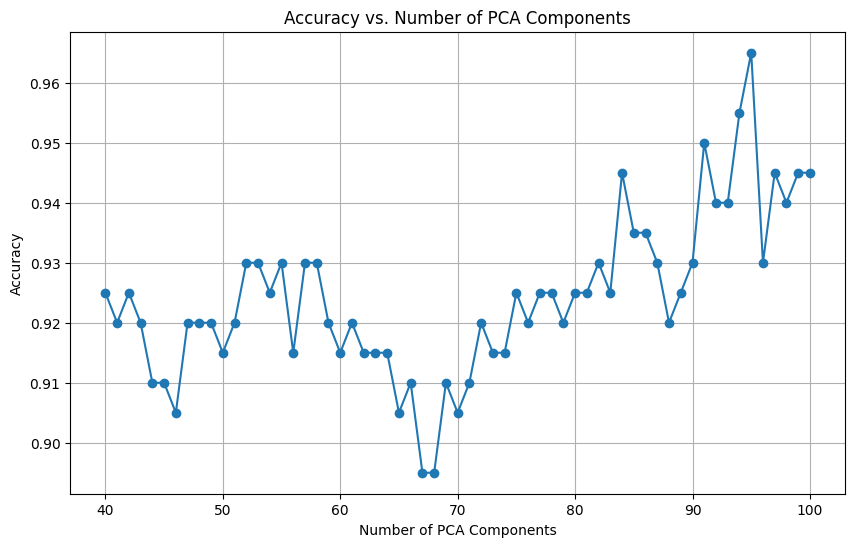

In [99]:
pca_components_range = range(40, 101)

accuracies = []

for num_components in pca_components_range:
    
    pca = PCA(n_components=num_components)
    X_train_pca = pca.fit_transform(X_train)
    
    X_test_pca = pca.transform(X_test)
    
    lda = LDA()
    lda.fit(X_train_pca, y_train)
    
    y_pred = lda.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Number of PCA components: {num_components}, Accuracy: {accuracy * 100:.2f}%')

plt.figure(figsize=(10, 6))
plt.plot(pca_components_range, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()